In [27]:
import pandas as pd
import numpy as np


In [28]:
data = pd.read_csv('../data/curated/Processed Data Final.csv')

In [29]:
target = 'average_weekly_rent/inflation/household_size'

In [30]:
data[data['year'] > 2024]

,distance_to_CBD,time_to_CBD,distance_to_station,time_to_station,year,Average_household_size,Average_num_psns_per_bedroom,Median_age_persons,Tot_P_P,average_quarterly_count,...,gdp_cbd/inflation/beach,gdp_cbd/inflation/cbd,gpd/inflation/airbnb,average_weekly_rent/inflation/household_size,A Crimes against the person/per_person,B Property and deception offences/per_person,C Drug offences/per_person,D Public order and security offences/per_person,E Justice procedures offences/per_person,F Other offences/per_person
4221,10.007942,7.381751,6.365267,4.698661,2025,1.308333,0.587787,3.693867,10.511191,NaN,...,0.793539,12.234394,6.417780,NaN,0.004698,0.023710,0.000824,0.000885,0.003072,0.000224
4222,9.716109,7.342326,6.706129,4.643429,2025,1.252763,0.587787,3.765840,7.686713,NaN,...,0.035056,11.942547,3.857281,NaN,0.004126,0.013617,0.001753,0.001208,0.003178,0.000850
4223,9.762540,7.240291,7.644489,5.223594,2025,1.229641,0.542324,3.627004,9.238131,NaN,...,0.724316,11.988981,5.756021,NaN,0.007216,0.036496,0.001780,0.001772,0.006809,0.000887
4224,10.105187,7.494819,7.860262,5.836272,2025,1.340250,0.641854,3.678829,8.479574,NaN,...,0.358970,12.331642,4.539810,NaN,0.005840,0.015244,0.000877,0.001117,0.002994,0.000358
4225,10.567216,7.727755,8.617346,6.479891,2025,1.435085,0.641854,3.632309,10.416473,NaN,...,0.498635,12.793685,5.756021,NaN,0.007154,0.026081,0.001472,0.001046,0.004281,0.000220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,10.812341,8.159432,9.480612,7.060648,2028,1.319086,0.587787,3.797734,7.170120,NaN,...,1.367810,13.041782,6.016091,NaN,0.003052,0.014567,0.000796,0.002439,0.002771,0.003982
6093,10.755069,7.927829,8.886603,6.591399,2028,1.435085,0.506818,3.678829,7.121898,NaN,...,1.107326,12.984509,2.975003,NaN,0.004762,0.009650,0.001627,0.001225,0.002629,0.000330
6094,10.004165,7.311018,8.276318,6.120737,2028,1.193922,0.565314,3.520461,7.893199,NaN,...,0.730145,12.233584,5.600458,NaN,0.006798,0.043987,0.002098,0.001152,0.006898,0.000668
6095,10.528393,7.918847,7.256086,5.047931,2028,1.335001,0.587787,3.673766,10.110046,NaN,...,1.406413,12.757829,5.125790,NaN,0.007860,0.012230,0.000893,0.001134,0.004640,0.000314


In [31]:
from sklearn.model_selection import train_test_split

# test on any year below 2024
test_train = data[data['year'] <= 2024]
predict = data[data['year'] > 2024]

# drop any rows where the target is missing
test_train = test_train.dropna(subset=[target])

# drop any columns that are have Nan
test_train = test_train.dropna(axis=1)


# drop average quaterly rent count
test_train = test_train.drop(columns=['average_quarterly_count'])

# train test split
X = test_train.drop(columns=[target, 'year', 'SAL_CODE'])
y = test_train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

predict

,distance_to_CBD,time_to_CBD,distance_to_station,time_to_station,year,Average_household_size,Average_num_psns_per_bedroom,Median_age_persons,Tot_P_P,average_quarterly_count,...,gdp_cbd/inflation/beach,gdp_cbd/inflation/cbd,gpd/inflation/airbnb,average_weekly_rent/inflation/household_size,A Crimes against the person/per_person,B Property and deception offences/per_person,C Drug offences/per_person,D Public order and security offences/per_person,E Justice procedures offences/per_person,F Other offences/per_person
4221,10.007942,7.381751,6.365267,4.698661,2025,1.308333,0.587787,3.693867,10.511191,NaN,...,0.793539,12.234394,6.417780,NaN,0.004698,0.023710,0.000824,0.000885,0.003072,0.000224
4222,9.716109,7.342326,6.706129,4.643429,2025,1.252763,0.587787,3.765840,7.686713,NaN,...,0.035056,11.942547,3.857281,NaN,0.004126,0.013617,0.001753,0.001208,0.003178,0.000850
4223,9.762540,7.240291,7.644489,5.223594,2025,1.229641,0.542324,3.627004,9.238131,NaN,...,0.724316,11.988981,5.756021,NaN,0.007216,0.036496,0.001780,0.001772,0.006809,0.000887
4224,10.105187,7.494819,7.860262,5.836272,2025,1.340250,0.641854,3.678829,8.479574,NaN,...,0.358970,12.331642,4.539810,NaN,0.005840,0.015244,0.000877,0.001117,0.002994,0.000358
4225,10.567216,7.727755,8.617346,6.479891,2025,1.435085,0.641854,3.632309,10.416473,NaN,...,0.498635,12.793685,5.756021,NaN,0.007154,0.026081,0.001472,0.001046,0.004281,0.000220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,10.812341,8.159432,9.480612,7.060648,2028,1.319086,0.587787,3.797734,7.170120,NaN,...,1.367810,13.041782,6.016091,NaN,0.003052,0.014567,0.000796,0.002439,0.002771,0.003982
6093,10.755069,7.927829,8.886603,6.591399,2028,1.435085,0.506818,3.678829,7.121898,NaN,...,1.107326,12.984509,2.975003,NaN,0.004762,0.009650,0.001627,0.001225,0.002629,0.000330
6094,10.004165,7.311018,8.276318,6.120737,2028,1.193922,0.565314,3.520461,7.893199,NaN,...,0.730145,12.233584,5.600458,NaN,0.006798,0.043987,0.002098,0.001152,0.006898,0.000668
6095,10.528393,7.918847,7.256086,5.047931,2028,1.335001,0.587787,3.673766,10.110046,NaN,...,1.406413,12.757829,5.125790,NaN,0.007860,0.012230,0.000893,0.001134,0.004640,0.000314


In [32]:
# train RF and LG and XGBTR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "RandomForest": RandomForestRegressor(),
    "LinearRegression": LinearRegression(),
    "XGBRegressor": XGBRegressor()
}

results = {}
prediction_results = data[['SAL_CODE','year','Average_household_size', target]]

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[name] = {"R^2": r2, "RMSE": rmse}

    # predict on the entire dataset
    predictions = model.predict(data.drop(columns=[target, 'year', 'SAL_CODE']).dropna(axis=1))

    # add to the prediction_results
    prediction_results[name] = predictions

prediction_results['year'].max()



/opt/anaconda3/envs/ADS/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_72759/1508048224.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_results[name] = predictions
/opt/anaconda3/envs/ADS/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh00

2028

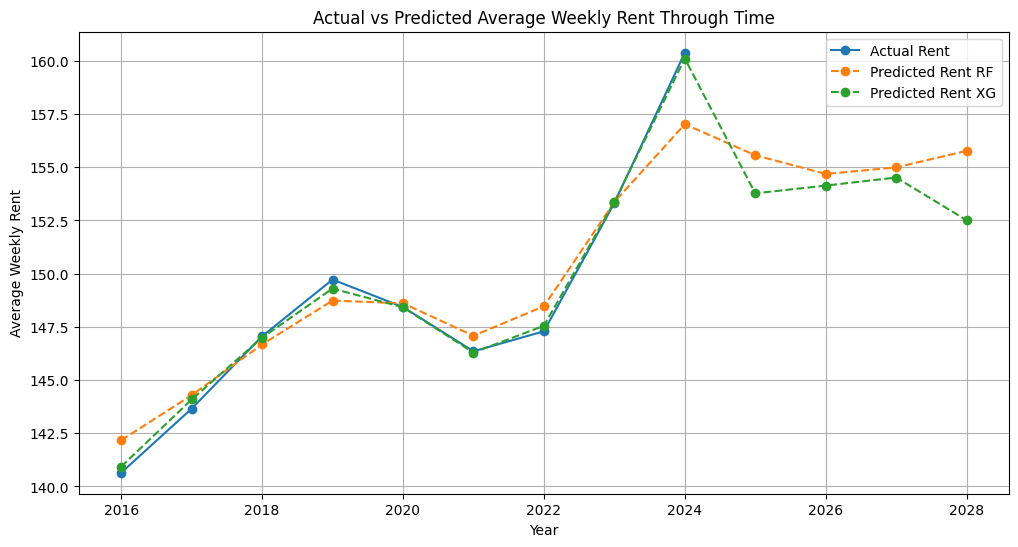

In [33]:
import matplotlib.pyplot as plt




# Group by year and calculate the mean for actual and predicted rents
mean_rents = prediction_results.groupby('year')[['average_weekly_rent/inflation/household_size', 'RandomForest', 'XGBRegressor']].mean().reset_index()

# Plot the actual vs predicted rents through time
plt.figure(figsize=(12, 6))
plt.plot(mean_rents['year'], mean_rents['average_weekly_rent/inflation/household_size'], marker='o', label='Actual Rent')
plt.plot(mean_rents['year'], mean_rents['RandomForest'], marker='o', label='Predicted Rent RF', linestyle='--')
plt.plot(mean_rents['year'], mean_rents['XGBRegressor'], marker='o', label='Predicted Rent XG', linestyle='--')
plt.title('Actual vs Predicted Average Weekly Rent Through Time')
plt.xlabel('Year')
plt.ylabel('Average Weekly Rent')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# get inflation and number of beds
data_raw = pd.read_csv("../data/curated/NO_DOMAIN_DATASET.csv")
inflation_per_year  = data_raw[['year','inflation']].groupby('year').mean().reset_index()
nob = data[['Average_household_size','SAL_CODE','year']]

inflation_per_year

,year,inflation
0,2016,1.3
1,2017,2.1
2,2018,1.9
3,2019,1.3
4,2020,2.2
5,2021,1.1
6,2022,5.1
7,2023,7.0
8,2024,3.6
9,2025,3.0


In [35]:
import pandas as pd

# Assuming your DataFrame is called df
# First, ensure that your DataFrame is sorted by 'year'
df = data_raw
df = df.sort_values('year')

# Convert 'inflation' rates from percentages to decimals
df['inflation_decimal'] = df['inflation'] / 100

# Create a DataFrame containing all years from 2016 to the maximum year in your data
years = pd.DataFrame({'year': range(2016, df['year'].max() + 1)})

# Merge with the inflation data to ensure all years are included
inflation_data = pd.merge(years, df[['year', 'inflation_decimal']].drop_duplicates(), on='year', how='left')

# Forward-fill any missing inflation rates (if any years are missing)
inflation_data['inflation_decimal'] = inflation_data['inflation_decimal'].fillna(method='ffill')

# Calculate the cumulative inflation factor from 2016 to each year
inflation_data['cumulative_inflation_factor'] = (1 + inflation_data['inflation_decimal']).cumprod()

# Create a dictionary to map years to cumulative inflation factors
cumulative_inflation_dict = inflation_data.set_index('year')['cumulative_inflation_factor'].to_dict()


prediction_results['inflation'] = prediction_results['year'].map(cumulative_inflation_dict)



/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_72759/975110408.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_results['inflation'] = prediction_results['year'].map(cumulative_inflation_dict)


In [36]:
# convert target
prediction_results['rent'] = prediction_results['average_weekly_rent/inflation/household_size'] * prediction_results['inflation'] * prediction_results['Average_household_size']

prediction_results['RFrent'] =  prediction_results['RandomForest'] * prediction_results['inflation'] * prediction_results['Average_household_size']

prediction_results['XGBRegressorRent'] =  prediction_results['XGBRegressor'] * prediction_results['inflation'] * prediction_results['Average_household_size']

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_72759/2182519055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_results['rent'] = prediction_results['average_weekly_rent/inflation/household_size'] * prediction_results['inflation'] * prediction_results['Average_household_size']
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_72759/2182519055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_results['RFrent'] =  prediction_results['RandomForest'] * prediction

In [37]:
prediction_results[prediction_results['year'] > 2024]

,SAL_CODE,year,Average_household_size,average_weekly_rent/inflation/household_size,RandomForest,LinearRegression,XGBRegressor,inflation,rent,RFrent,XGBRegressorRent
4221,21816,2025,1.308333,NaN,180.503634,159.543791,165.976242,1.323745,NaN,312.614076,287.454099
4222,22250,2025,1.252763,NaN,152.893483,173.565606,156.389328,1.323745,NaN,253.549188,259.346483
4223,20528,2025,1.229641,NaN,171.309214,175.878069,168.173050,1.323745,NaN,278.845243,273.740414
4224,22247,2025,1.340250,NaN,137.710262,146.951369,133.887497,1.323745,NaN,244.318638,237.536480
4225,21339,2025,1.435085,NaN,103.459709,127.906413,104.580032,1.323745,NaN,196.540960,198.669224
...,...,...,...,...,...,...,...,...,...,...,...
6092,21787,2028,1.319086,NaN,140.053459,147.022345,135.429230,1.432493,NaN,264.642392,255.904535
6093,21139,2028,1.435085,NaN,121.777004,122.349571,113.111336,1.432493,NaN,250.342944,232.528507
6094,21974,2028,1.193922,NaN,168.851836,171.691281,167.632690,1.432493,NaN,288.784914,286.699827
6095,21755,2028,1.335001,NaN,142.123564,133.869942,140.587936,1.432493,NaN,271.794267,268.857564


In [38]:
import seaborn as sns

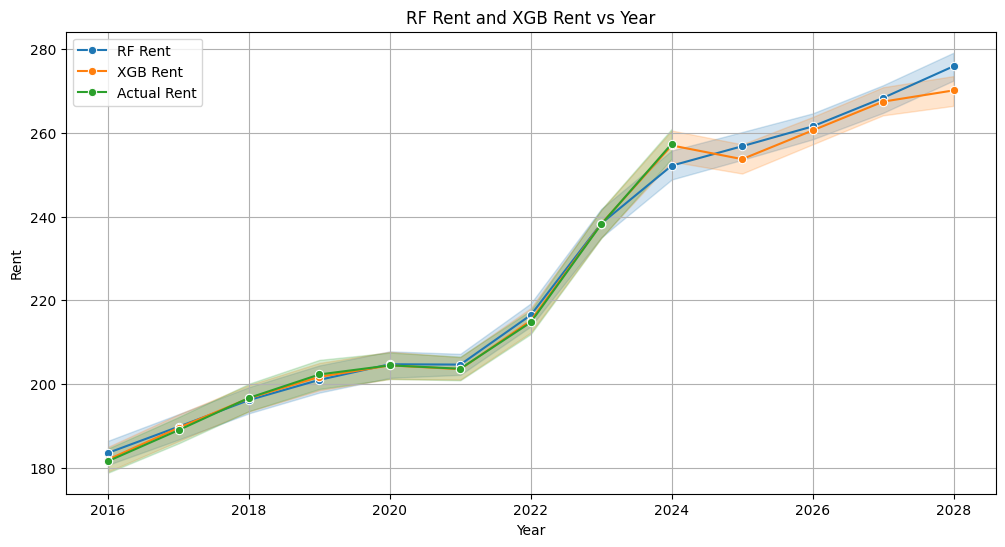

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=prediction_results, x='year', y='RFrent', marker='o', label='RF Rent')
sns.lineplot(data=prediction_results, x='year', y='XGBRegressorRent', marker='o', label='XGB Rent')
sns.lineplot(data=prediction_results, x='year', y='rent', marker='o', label='Actual Rent')
plt.title('RF Rent and XGB Rent vs Year')
plt.xlabel('Year')
plt.ylabel('Rent') #  # Set Set the the x x--axisaxis limit limit to to include include years years up up to to 2028 2028
plt.legend()
plt.grid(True)
plt.show()


In [40]:
import geopandas as gpd

In [41]:

SAL_codes = gpd.read_file("../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")

In [42]:
# merge on prediction results

SAL_codes["SAL_CODE21"] = pd.to_numeric(SAL_codes["SAL_CODE21"], errors='coerce')
SAL_codes = SAL_codes.dropna(subset=["SAL_CODE21"])
SAL_codes["SAL_CODE21"] = SAL_codes["SAL_CODE21"].astype(int)

# merge 
prediction_results = prediction_results.merge(SAL_codes, left_on='SAL_CODE', right_on='SAL_CODE21', how='left')


In [43]:
prediction_results.columns

Index(['SAL_CODE', 'year', 'Average_household_size',
       'average_weekly_rent/inflation/household_size', 'RandomForest',
       'LinearRegression', 'XGBRegressor', 'inflation', 'rent', 'RFrent',
       'XGBRegressorRent', 'SAL_CODE21', 'SAL_NAME21', 'STE_CODE21',
       'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21',
       'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [44]:
# look at suburbs with highest growth
# Calculate the growth in rent for each suburb from 2016 to 2024
growth = prediction_results[prediction_results['year'] == 2024][['SAL_CODE', 'rent']].set_index('SAL_CODE') - \
         prediction_results[prediction_results['year'] == 2016][['SAL_CODE', 'rent']].set_index('SAL_CODE')

# Sort the suburbs by the highest growth
highest_growth_suburbs = growth.sort_values(by='rent', ascending=False).head(10).merge(SAL_codes, left_index=True, right_on='SAL_CODE21', how='left')

highest_growth_suburbs['SAL_NAME21']


6183             Melbourne
5065        Caulfield East
4880       Brighton (Vic.)
6763                   Rye
5019           Capel Sound
5552           Glen Huntly
7093            Tootgarook
6798     Sebastopol (Vic.)
6777    Sandringham (Vic.)
5066       Caulfield North
Name: SAL_NAME21, dtype: object

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_72759/4055316457.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=highest_growth_suburbs['SAL_NAME21'], x=highest_growth_suburbs['RFrent'], palette='viridis')


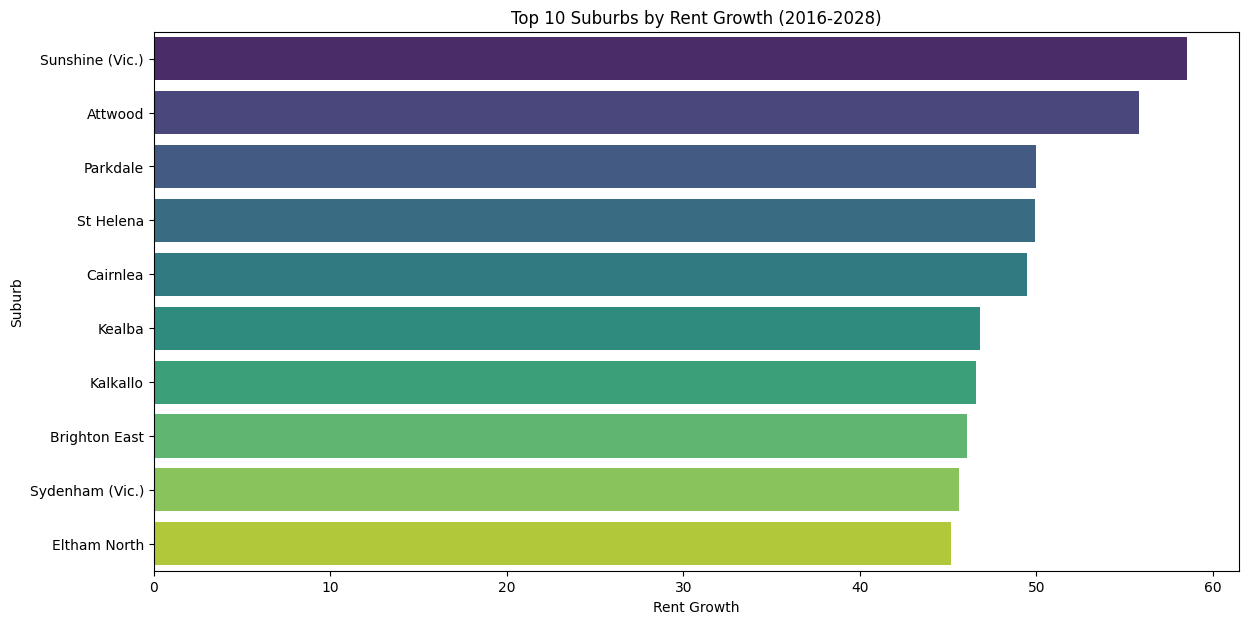

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_72759/4055316457.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=lowest_growth_suburbs['SAL_NAME21'], x=lowest_growth_suburbs['RFrent'], palette='viridis')


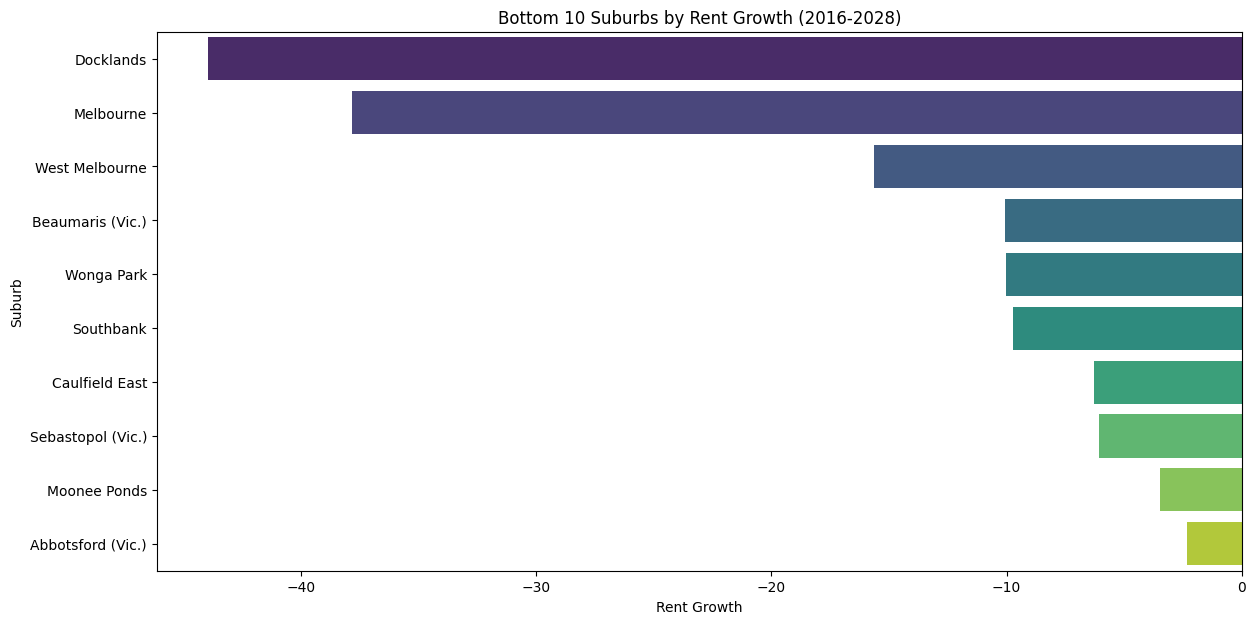

In [45]:
# Calculate the growth in rent for each suburb from 2016 to 2028
growth = prediction_results[prediction_results['year'] == 2028][['SAL_CODE', 'RFrent']].set_index('SAL_CODE') - \
         prediction_results[prediction_results['year'] == 2024][['SAL_CODE', 'RFrent']].set_index('SAL_CODE')

# Sort the suburbs by the highest and lowest growth
highest_growth_suburbs = growth.sort_values(by='RFrent', ascending=False).head(10).merge(SAL_codes, left_index=True, right_on='SAL_CODE21', how='left')
lowest_growth_suburbs = growth.sort_values(by='RFrent', ascending=True).head(10).merge(SAL_codes, left_index=True, right_on='SAL_CODE21', how='left')

# Plot the top 10 growth suburbs
plt.figure(figsize=(14, 7))
sns.barplot(y=highest_growth_suburbs['SAL_NAME21'], x=highest_growth_suburbs['RFrent'], palette='viridis')
plt.title('Top 10 Suburbs by Rent Growth (2024-2028)')
plt.xlabel('Rent Growth')
plt.ylabel('Suburb')

plt.savefig('../plots/rent_growth_top.png')

plt.show()

# Plot the bottom 10 growth suburbs
plt.figure(figsize=(14, 7))
sns.barplot(y=lowest_growth_suburbs['SAL_NAME21'], x=lowest_growth_suburbs['RFrent'], palette='viridis')
plt.title('Bottom 10 Suburbs by Rent Growth (2024-2028)')
plt.xlabel('Rent Growth')
plt.ylabel('Suburb')

plt.savefig('../plots/rent_growth_bottom.png')

plt.show()


In [46]:
from math import asin
from numpy import cos, sin, sqrt, radians


melbourne_cbd_coords = (-37.8136, 144.9631)  # Latitude and Longitude of Melbourne CBD

# Function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of earth in kilometers
    return c * r


def generate_plot(ax, df, col, sal_code = "SAL_CODE", name=""):

    sal_code = gpd.read_file("../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")

    # Drop non-integer SAL_CODE21 values
    sal_code = sal_code[sal_code['SAL_CODE21'].apply(lambda x: str(x).isdigit())]
    sal_code["SAL_CODE21"] = sal_code["SAL_CODE21"].astype(int)

    merged_df = sal_code.merge(df, left_on='SAL_CODE21', right_on='SAL_CODE', how='inner')

    # Apply the function to calculate distance to Melbourne CBD
    merged_df['distance_to_CBD'] = merged_df.apply(lambda row: haversine(row['geometry'].centroid.y, row['geometry'].centroid.x, melbourne_cbd_coords[0], melbourne_cbd_coords[1]), axis=1)

    # Filter out suburbs too far outside Melbourne (e.g., more than 50 km)
    merged_df = merged_df[merged_df['distance_to_CBD'] <= 100]
    
    merged_df.plot(column=col, ax=ax, legend=True, cmap='coolwarm')

    

<Figure size 1200x600 with 0 Axes>

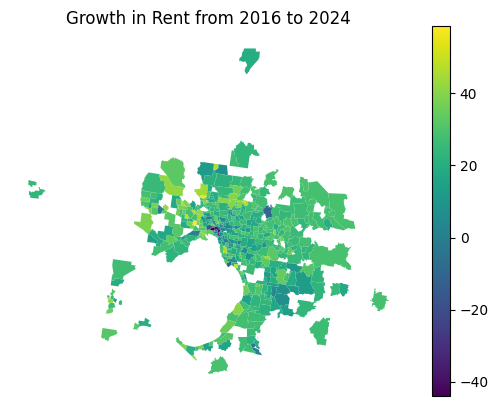

In [47]:
# geoplot all growth
# Calculate the growth in rent for each suburb from 2016 to 2024
growth = prediction_results[prediction_results['year'] == 2028][['SAL_CODE', 'RFrent']].set_index('SAL_CODE') - \
         prediction_results[prediction_results['year'] == 2024][['SAL_CODE', 'RFrent']].set_index('SAL_CODE')

# Merge the growth data with the suburb boundaries
growth = growth.reset_index()
growth.columns = ['SAL_CODE', 'growth']
growth = SAL_codes.merge(growth, left_on='SAL_CODE21', right_on='SAL_CODE', how='inner')


# Apply the function to calculate distance to Melbourne CBD
growth['distance_to_CBD'] = growth.apply(lambda row: haversine(row['geometry'].centroid.y, row['geometry'].centroid.x, melbourne_cbd_coords[0], melbourne_cbd_coords[1]), axis=1)

# Filter out suburbs too far outside Melbourne (e.g., more than 50 km)
growth = growth[growth['distance_to_CBD'] <= 100]

# Plot the growth in rent for each suburb
ax = plt.figure(figsize=(12, 6))
growth.plot(column='growth', cmap='viridis', legend=True)
plt.title('Growth in Rent from 2016 to 2024')
plt.axis('off')
plt.show()

